# **👒 Clothes Classification using TensorFlow**

In [23]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

print(tf.__version__)

2.17.0


In [24]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

| Label | Class       |
|-------|-------------|
| 0     | T-shirt/top |
| 1     | Trouser     |
| 2     | Pullover    |
| 3     | Dress       |
| 4     | Coat        |
| 5     | Sandal      |
| 6     | Shirt       |
| 7     | Sneaker     |
| 8     | Bag         |
| 9     | Ankle boot  |


In [25]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [26]:
# There are 60,000 images in the training set, with each image represented as 28 x 28 pixels.

print(train_images.shape)
print(len(train_labels))

(60000, 28, 28)
60000


In [27]:
# Each label is an integer between 0 and 9.
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [28]:
# There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels.
print(test_images.shape)
print(len(test_labels))

(10000, 28, 28)
10000


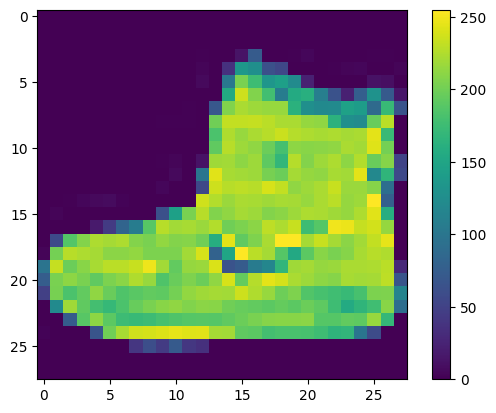

In [30]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [31]:
# Scale these values to a range of 0 to 1 before feeding them to the neural network model.

train_images = train_images / 255.0
test_images = test_images / 255.0

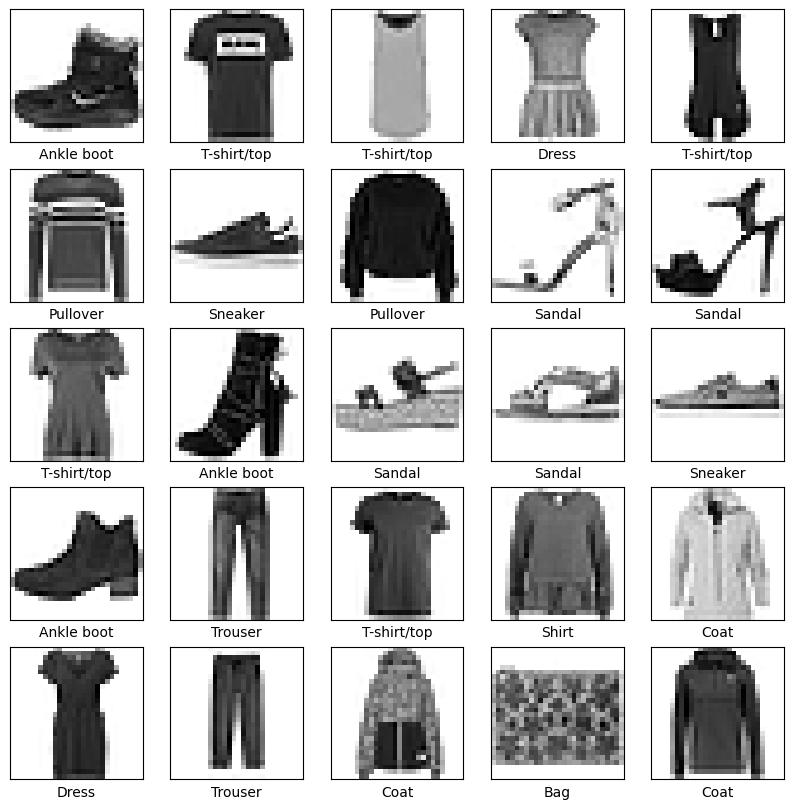

In [35]:
plt.figure(figsize = (10, 10))

for i in range(25):
  plt.subplot(5, 5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap = plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(10)
])

In [37]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics = ['accuracy']
)

In [40]:
# Feed the model

model.fit(train_images, train_labels, epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9117 - loss: 0.2339
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9174 - loss: 0.2208
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9193 - loss: 0.2173
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9195 - loss: 0.2132
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9236 - loss: 0.2050
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9286 - loss: 0.1923
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9289 - loss: 0.1890
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9284 - loss: 0.1913
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9302 - loss: 0.1870
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9343 - loss: 0.1727


In [42]:
# Evaluate accuracy

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - 1ms/step - accuracy: 0.8809 - loss: 0.3550

Test accuracy: 0.8809000253677368


In [46]:
probability_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

In [47]:
predictions = probability_model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [48]:
print(predictions[0])

[1.5055538e-11 9.8179013e-17 4.6029565e-12 2.3509823e-16 4.8127561e-12
 5.9749815e-05 3.1252721e-14 8.6084590e-04 1.3287564e-10 9.9907935e-01]


In [51]:
print(np.argmax(predictions[0]))
print(test_labels[0])

9
9


In [52]:
def plot_image(i, predictions_array, true_label, img):
  true_label , img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap = plt.cm.binary)

  predicted_label = np.argmax(predictions_array)

  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]),
             color = color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

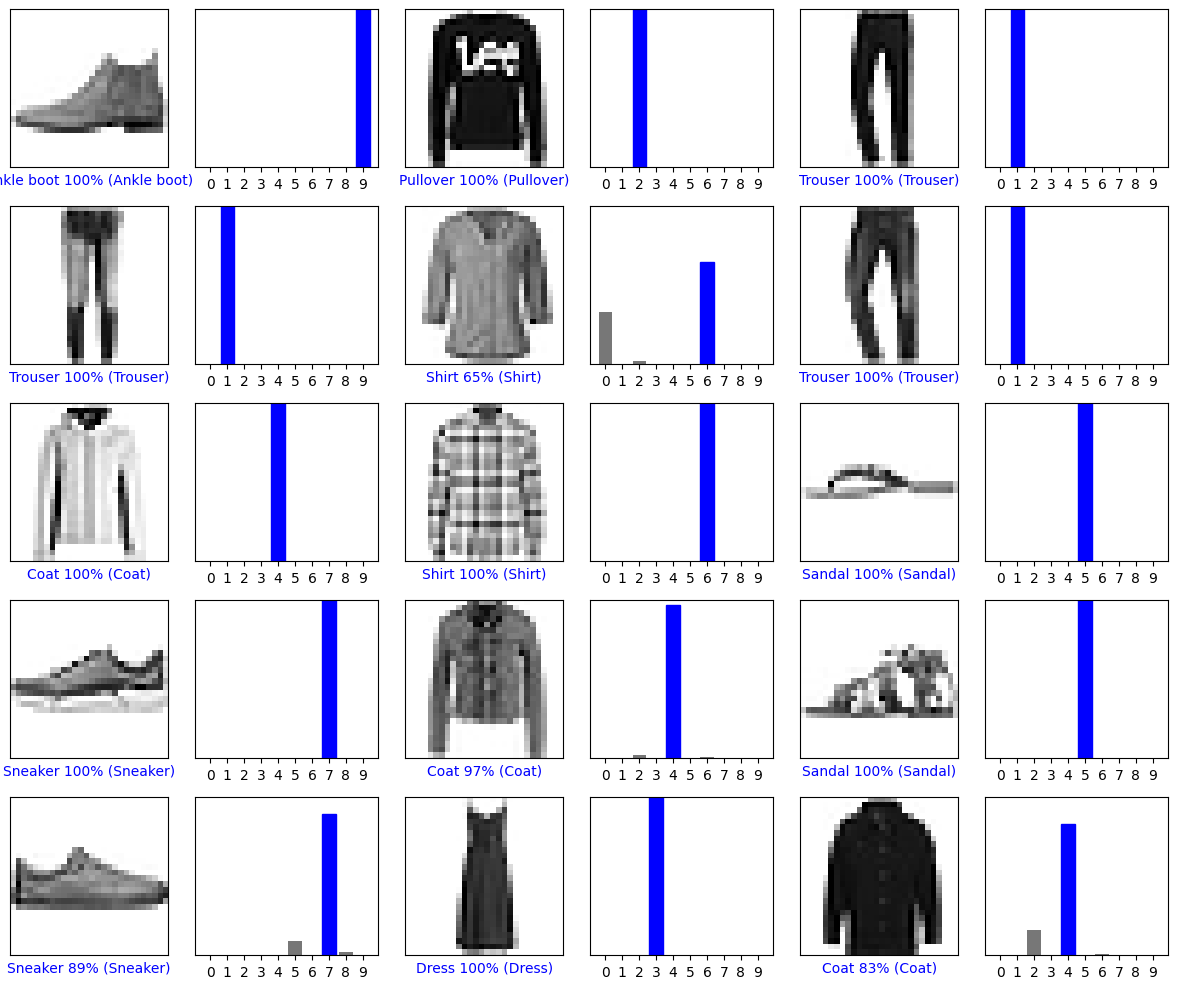

In [55]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [57]:
## Now we can use the trained model
# Grab an image from the test dataset

img = test_images[1]
print(img.shape)

img = (np.expand_dims(img, 0))
print(img.shape)

(28, 28)
(1, 28, 28)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[[1.5150933e-04 4.7799704e-17 9.9704927e-01 4.8201249e-10 1.1562504e-03
  7.0320845e-14 1.6429434e-03 1.6367347e-16 1.4324620e-09 1.8589507e-14]]


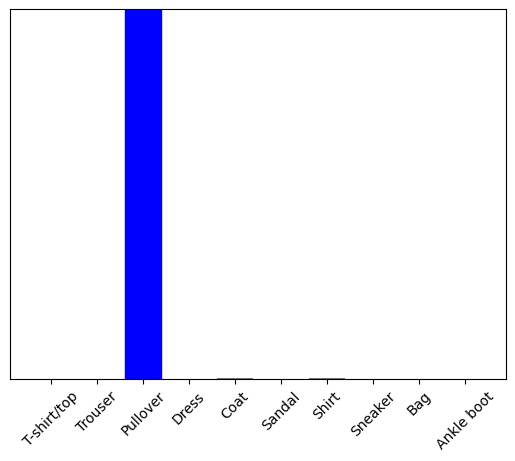

In [59]:
predictions_single = probability_model.predict(img)
print(predictions_single)

plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation = 45)

plt.show()

In [60]:
np.argmax(predictions_single[0])

2

**And the model predicts a label as expected. 🎉**